In [1]:
'''
sensor_surfaceに関する処理
参考
https://qiita.com/mhangyo/items/76db7c6a6ebba6cf4330

dtypeに関する資料
http://discexuno.wp.xdomain.jp/machine-learning/python_fromfile_fromstring/
https://docs.python.org/3/library/struct.html

3Dfigure
https://morvanzhou.github.io/tutorials/data-manipulation/plt/3-5-3d/

一次元波動
http://wakabame.hatenablog.com/entry/2018/03/07/205717
'''
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import cv2 
from scipy.fftpack import fft,ifft
import os
import glob
from pylab import *
import math
import matplotlib.animation as animation




## 付録ーーデータの展開法

一つの実験についてのデータは四つのフォルダーに分けております。
そのうち、「Height」と書いてるフォルダーに変異データが入ってます。
そのフォルダーの中には縦方向（Y軸）の画素分のデータファイルがあります。
一つのファイルには一行についての画像枚分のデータが横方向（X軸）の画素分重ねております。

つまり、X行、Y棚、Fフレームのデータポイントを見つけるには
Y個目のファイルを開いて、X×フレーム数（16666frames=500fps×33.3s）＋F　のインデックスでXYFのデータがあります。

データ自体は64bit doubleです。バイトオーダーはビッグエンディアンです (byte order: big endian)。ヘッダーはないです。

どうぞよろしくお願いします。
ライオン

他の設定に関する情報元(resolution/framerate/downsampling,etc)　　\\FS1\Maedalab\home\junjie-hua\wave\fourD_sensor\rawdata\20191101\Captures


#f = open(r"\\FS1\Maedalab\home\junjie-hua\wave\fourD_sensor\rawdata\20191101\test1_belly\Height\Height Row 0000.data",mode='rb')#0列目
#topo = np.fromfile(f, dtype='float64',sep='').reshape(256,20000) #float64の形で読み込むと，5120000の数列ができました．bellyの計測時間=20*1000msため，256*20000とreshapeしました．x軸上のサンプリング点が256個となります．


## 12/18 update
sensor side+display side　直線(left right二本　振動子につく直線とついていない直線)のfftを見たい まず直線上で決着付ける　振動が見えるなら，画像全体fftを見る





In [2]:
#path = "//FS1//Maedalab//home//junjie-hua//wave//fourD_sensor//rawdata//20191101//test3_sensor_surface//Height" #display上の計測データ元　
path = "C://Users//huaju//Documents//data//fourD_sensor//20191101//test3_sensor//Height" #display上の計測データ元　

files = os.listdir(path) #all files in the faulder　縦方向(y軸)のデータファイル
s = []
xnum = 512
T = 16666
ynum = 0

#os.chdir("//FS1//Maedalab//home//junjie-hua//wave//fourD_sensor//rawdata//20191101//test2_display_surface//Height") #local()関数を利用するためのコードです
os.chdir("C://Users//huaju//Documents//data//fourD_sensor//20191101//test3_sensor//Height") #local()関数を利用するためのコードです

print("reading files")
for file in glob.glob("*.data"): 
    f = open(path + "//" + file ,mode='rb')#n列目　rb= read binary
    name = 'topo'+str(ynum)  #一つのファイルには一行についての画像枚分のデータが横方向（X軸）の画素分のデータを変数topo+str(n)に入れます
    locals()['topo'+str(ynum)]= np.fromfile(f, dtype='>d').reshape(xnum,T) 
    # https://docs.python.org/3/library/struct.html
    # ">" means big endian, "d" means double. 8532992の数列ができました．
    #print(file,"has ended")
    ynum = ynum + 1 
     
print(ynum ,"y-axis files") #y軸上サンプリング点の数を数えます--505個


reading files
505 y-axis files


In [3]:
"""
funtion block

"""
# (x,y,t)のデータを取り出すための関数 
names = locals()
def f(x,y,t): 
    k = names['topo'+str(y)][x,t]  #topo_str(y)の数列から，(x,t)のデータを取り出します
    return k

In [4]:
'''
color mapのアニメーション
'''

'''
# (x,y,t)のデータを取り出すための関数 
names = locals()
def f(x,y,t): 
    k = names['topo'+str(y)][x,t]  #topo_str(y)の数列から，(x,t)のデータを取り出します
    return k
#print(f(511,504,16666-1))
#print(f(505,0,0))


# X, Y value
x = np.linspace(0,xnum-1,xnum)
y = np.linspace(0,ynum-1,ynum)
X,Y = np.meshgrid(x,y)  #サンプリング点の数：x軸512個， y軸505個


#Z = [[0 for i in range(X.shape[1])] for i in range(Y.shape[0])]
Z = [[0 for row in range(xnum)] for col in range(ynum)]  #Z--x列y行    e.g. arr2D = [[ 0 for col in range(10) ] for row in range(4) ]-- 10列4行


print(" color map start")
for t in range(T):
    if t % 100 == 0:
        for y in range(ynum):#y軸
            for x in range(xnum):#x軸
                #print(x,y,t)
                Z[y][x] = f(x,y,t)     
        Z_array = np.array(Z)# turn list into array
        
       # color mapを作成する
        plt.pcolormesh(X, Y, Z_array, cmap='jet',vmin=-3,vmax=3) 
        pp=plt.colorbar (orientation="vertical") # カラーバーの表示 

        plt.xlabel('X', fontsize=18)
        plt.ylabel('Y', fontsize=18)
        plt.title("T = %s ms"% (t))
        plt.axes().set_aspect('equal')

        #print(t)
        #plt.savefig("//FS1//Maedalab//home//junjie-hua//wave//fourD_sensor//rawdata//20191101//Captures//animation//color_map//test3_sensor_surface//" + str(t) + ".png")
        plt.savefig("C://Users//huaju//Documents//data//fourD_sensor//20191101//Captures//animation//color_map//test3_sensor//global//" + str(t) + ".png")
        #plt.show()
        plt. close()
    else:
        continue

        
print("color map end")

'''

'\n# (x,y,t)のデータを取り出すための関数 \nnames = locals()\ndef f(x,y,t): \n    k = names[\'topo\'+str(y)][x,t]  #topo_str(y)の数列から，(x,t)のデータを取り出します\n    return k\n#print(f(511,504,16666-1))\n#print(f(505,0,0))\n\n\n# X, Y value\nx = np.linspace(0,xnum-1,xnum)\ny = np.linspace(0,ynum-1,ynum)\nX,Y = np.meshgrid(x,y)  #サンプリング点の数：x軸512個， y軸505個\n\n\n#Z = [[0 for i in range(X.shape[1])] for i in range(Y.shape[0])]\nZ = [[0 for row in range(xnum)] for col in range(ynum)]  #Z--x列y行    e.g. arr2D = [[ 0 for col in range(10) ] for row in range(4) ]-- 10列4行\n\n\nprint(" color map start")\nfor t in range(T):\n    if t % 100 == 0:\n        for y in range(ynum):#y軸\n            for x in range(xnum):#x軸\n                #print(x,y,t)\n                Z[y][x] = f(x,y,t)     \n        Z_array = np.array(Z)# turn list into array\n        \n       # color mapを作成する\n        plt.pcolormesh(X, Y, Z_array, cmap=\'jet\',vmin=-3,vmax=3) \n        pp=plt.colorbar (orientation="vertical") # カラーバーの表示 \n\n        plt.xlabel(\

In [5]:
'''
横波の伝播を観測したいのですが、皮膚が粘弾性なので観測時間幅として200msは短すぎる可能性があります。
また皮膚の形状の特徴を失わせたいので、
9600-10300ms  x-100~150 y-275~325  200fps

color map method 2019 version
'''

'''
# (x,y,t)のデータを取り出すための関数 
names = locals()
def f(x,y,t): 
    k = names['topo'+str(y)][x,t]  #topo_str(y)の数列から，(x,t)のデータを取り出します
    return k
#print(f(255,251,19999))

xmin = 100
xmax = 150
ymin =275
ymax =325
tmin = 9600
tmax = 10300



x = np.linspace(xmin,xmax-1,xmax-xmin)
y = np.linspace(ymin,ymax-1,ymax-ymin)
X,Y = np.meshgrid(x,y)  #サンプリング点の数：x軸256個， y軸252個
#Z = [[0 for i in range(64)] for i in range(64)] #Z--y行x列
Z = [[0 for row in range(xmax-xmin)] for col in range(ymax-ymin)]  #Z--x列y行    e.g. arr2D = [[ 0 for col in range(10) ] for row in range(4) ]-- 10列4行

#print(X.shape)


print("color map(difference)start")
for t in range(tmin,tmax):
    for y in range(ymin,ymax):#y軸
        for x in range(xmin,xmax):#x軸
            Z[y-ymin][x-xmin] = f(x,y,t) - f(x,y,tmin)
    Z_array = np.array(Z)# turn list into array
    #print(Z_array)  
    
    # color mapを作成する
    #plt.pcolormesh(X, Y, Z_array, cmap='coolwarm',vmin=0,vmax=5) # 等高線図の生成。cmapで色付けの規則を指定する。
    plt.pcolormesh(X, Y, Z_array, cmap='coolwarm',vmin=-0.5,vmax=0.5) # 等高線図の生成。cmapで色付けの規則を指定する。
    pp=plt.colorbar (orientation="vertical") # カラーバーの表示 
    
    # 等高線図
    #C = plt.contour(X,Y, Z_array, np.linspace(0,0.4,2), colors='black', linewidth=5)
    

    plt.xlabel('X', fontsize=18)
    plt.ylabel('Y', fontsize=18)
    plt.title("T = %s ms"% (t))
    plt.axes().set_aspect('equal')

    #print(t)
    #plt.savefig("//FS1//Maedalab//home//junjie-hua//wave//fourD_sensor//rawdata//20191101//Captures//animation//color_map//test3_sensor//narrow//" + str(t) + ".png")
    plt.savefig("C://Users//huaju//Documents//data//fourD_sensor//20191101//Captures//animation//color_map//test3_sensor//narrow//difference//" + str(t) + ".png")
    #plt.show()
    plt. close()


print("color map(difference) ended")
'''

'\n# (x,y,t)のデータを取り出すための関数 \nnames = locals()\ndef f(x,y,t): \n    k = names[\'topo\'+str(y)][x,t]  #topo_str(y)の数列から，(x,t)のデータを取り出します\n    return k\n#print(f(255,251,19999))\n\nxmin = 100\nxmax = 150\nymin =275\nymax =325\ntmin = 9600\ntmax = 10300\n\n\n\nx = np.linspace(xmin,xmax-1,xmax-xmin)\ny = np.linspace(ymin,ymax-1,ymax-ymin)\nX,Y = np.meshgrid(x,y)  #サンプリング点の数：x軸256個， y軸252個\n#Z = [[0 for i in range(64)] for i in range(64)] #Z--y行x列\nZ = [[0 for row in range(xmax-xmin)] for col in range(ymax-ymin)]  #Z--x列y行    e.g. arr2D = [[ 0 for col in range(10) ] for row in range(4) ]-- 10列4行\n\n#print(X.shape)\n\n\nprint("color map(difference)start")\nfor t in range(tmin,tmax):\n    for y in range(ymin,ymax):#y軸\n        for x in range(xmin,xmax):#x軸\n            Z[y-ymin][x-xmin] = f(x,y,t) - f(x,y,tmin)\n    Z_array = np.array(Z)# turn list into array\n    #print(Z_array)  \n    \n    # color mapを作成する\n    #plt.pcolormesh(X, Y, Z_array, cmap=\'coolwarm\',vmin=0,vmax=5) # 等高線図の生成。cmapで色

 color map start


C:\Users\huaju\Miniconda3\lib\site-packages\ipykernel_launcher.py:50: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


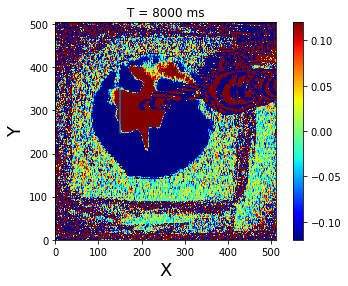

color map end


In [7]:
'''
color map 2020 version
'''




# (x,y,t)のデータを取り出すための関数 
names = locals()
def f(x,y,t): 
    k = names['topo'+str(y)][x,t]  #topo_str(y)の数列から，(x,t)のデータを取り出します
    return k



# X, Y value
x = np.linspace(0,xnum-1,xnum)
y = np.linspace(0,ynum-1,ynum)
X,Y = np.meshgrid(x,y)  #サンプリング点の数：x軸512個， y軸505個


#Z = [[0 for i in range(X.shape[1])] for i in range(Y.shape[0])]
Z = [[0 for row in range(xnum)] for col in range(ynum)]  #Z--x列y行    e.g. arr2D = [[ 0 for col in range(10) ] for row in range(4) ]-- 10列4行


print(" color map start")
for t in range(T):
    if t  == 8000:
        for y in range(ynum):#y軸
            for x in range(xnum):#x軸
                #print(x,y,t)
                Z[y][x] = f(x,y,t)     
        Z_array = np.array(Z)# turn list into array
        
        
        # color mapを作成する
        plt.pcolormesh(X, Y, Z_array, cmap='jet',vmin=-0.12,vmax=0.12) 
        pp=plt.colorbar (orientation="vertical") # カラーバーの表示 
        
        y = np.arange(250,350)
        x = 0 * y + 150 #(150，250)to(150，350)
        plt.plot(x,y)
        #x = np.arange(165,335)
        #y = 1.2058823529411764 * x - 51.470588235294116 #(165,147.5)to(335,352.5)
        #plt.plot(x,y)

        plt.xlabel('X', fontsize=18)
        plt.ylabel('Y', fontsize=18)
        plt.title("T = %s ms"% (t)) 
        plt.axes().set_aspect('equal')

        #print(t)
        #plt.savefig("//FS1//Maedalab//home//junjie-hua//wave//fourD_sensor//rawdata//20191101//Captures//animation//color_map//test3_sensor//narrow//" + str(t) + ".png")
        #plt.savefig("C://Users//huaju//Documents//data//fourD_sensor//20191101//Captures//animation//color_map//test3_sensor//global//" + str(t) + ".png")
        plt.show()
        plt. close()
    else:
        continue

        
print("color map end")


16666


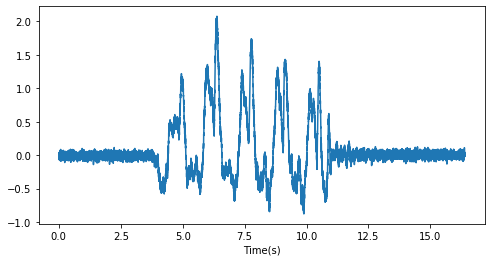

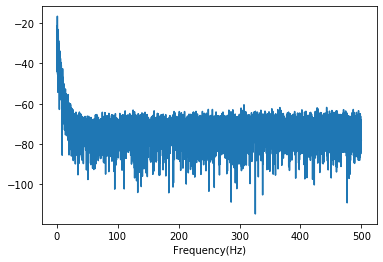

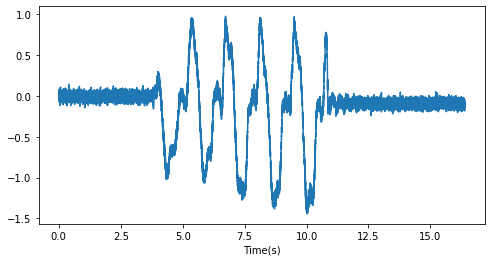

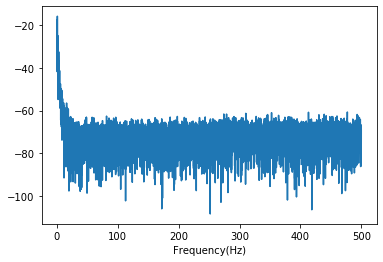

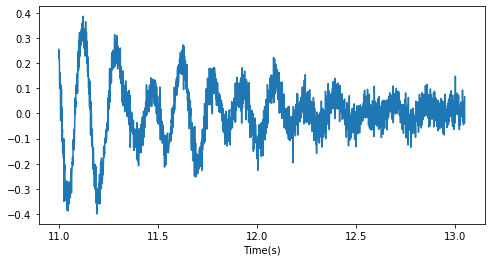

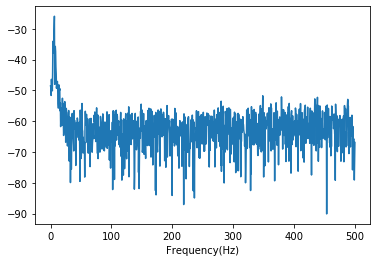

fft analysis end


In [8]:
"""
直線(left right二本　振動子につく直線とついていない直線)のfftを見たい まず直線上で決着付ける　振動が見えるなら，画像全体fftを見る

2020/02/09 update 
No.1   y = np.arange(250,350)
       x = 0 * y + 150 #(150，250)to(150，350)


"""


# (x,y,t)のデータを取り出すための関数 
names = locals()
def f(x,y,t): 
    k = names['topo'+str(y)][x,t]  #topo_str(y)の数列から，(x,t)のデータを取り出します
    return k

sampling_rate = 1000
fft_size = 16384
t = np.arange(0, fft_size/sampling_rate, 1/sampling_rate) 
x = zeros(T)
print(len(x))
#print(x[0])


# point (150,250)
for timing in range(T):
    #print(f(360,325,timing) )
    x[timing] = f(150,250,timing)    
xs = x[:fft_size]
#print(len(xs))
xf = np.fft.rfft(xs)/fft_size
freqs = np.linspace(0, sampling_rate/2, fft_size/2+1)
xfp = 20*np.log10(np.clip(np.abs(xf), 1e-20, 1e100))

plt.figure(figsize=(8,4))
plt.plot(t, xs)
plt.xlabel("Time(s)")
plt.show()
plt.plot(freqs, xfp)
plt.xlabel("Frequency(Hz)")
plt.subplots_adjust(hspace=0.4)
plt.show()

# point (150,350)
for timing in range(T):
    #print(f(360,325,timing) )
    x[timing] = f(150,350,timing)    
xs = x[:fft_size]
#print(len(xs))
xf = np.fft.rfft(xs)/fft_size
freqs = np.linspace(0, sampling_rate/2, fft_size/2+1)
xfp = 20*np.log10(np.clip(np.abs(xf), 1e-20, 1e100))

plt.figure(figsize=(8,4))
plt.plot(t, xs)
plt.xlabel("Time(s)")
plt.show()
plt.plot(freqs, xfp)
plt.xlabel("Frequency(Hz)")
plt.subplots_adjust(hspace=0.4)
plt.show()


# point (250,300)
fft_size_1 = 2048
t_1 = np.arange(11000/sampling_rate, (11000+fft_size_1)/sampling_rate, 1/sampling_rate) 
x = zeros(T)
for timing in range(11000,11000+fft_size_1):
    #print(f(360,325,timing) )
    x[timing-11000] = f(250,300,timing)    
xs = x[:fft_size_1]
#print(len(xs))
xf = np.fft.rfft(xs)/fft_size_1
freqs = np.linspace(0, sampling_rate/2, fft_size_1/2+1)
xfp = 20*np.log10(np.clip(np.abs(xf), 1e-20, 1e100))

plt.figure(figsize=(8,4))
plt.plot(t_1,xs)
plt.xlabel("Time(s)")
plt.show()
plt.plot(freqs, xfp)
plt.xlabel("Frequency(Hz)")
plt.subplots_adjust(hspace=0.4)
plt.show()

print("fft analysis end")


In [9]:
"""
No.1   y = np.arange(250,350)
       x = 0 * y + 150 #(150，250)to(150，350)
"""

"""
y = np.arange(250,350)
x = 0 * y + 150 #(150，250)to(150，350)
z = zeros(100)
#print(len(y))
#print(len(z))

print(" wave analysis start")
for t in range(10000,T):
    #if t  == 8000:
        for y in range(250,350):#y軸
            z[y-250] = f(0 * y + 150,y,t) 
            #print(z[y-250])
        
        y = np.arange(250,350)
        plt.plot(y,z)
        plt.xlabel('Y ', fontsize=18)
        plt.ylabel('Z', fontsize=18)
        plt.ylim(-1,2.5)
        plt.title("x = 0 * y + 150, T = %s ms "% (t)) 

        #print(t)
        #plt.savefig("//FS1//Maedalab//home//junjie-hua//wave//fourD_sensor//rawdata//20191101//Captures//animation//color_map//test3_sensor//narrow//" + str(t) + ".png")
        plt.savefig("C://Users//huaju//Documents//data//fourD_sensor//20191101//Captures//animation//color_map//test3_sensor//wave//" + str(t) + ".png")
        #plt.show()
        plt. close()
    #else:
        #continue




print("wave analysis end")
"""

'\ny = np.arange(250,350)\nx = 0 * y + 150 #(150，250)to(150，350)\nz = zeros(100)\n#print(len(y))\n#print(len(z))\n\nprint(" wave analysis start")\nfor t in range(10000,T):\n    #if t  == 8000:\n        for y in range(250,350):#y軸\n            z[y-250] = f(0 * y + 150,y,t) \n            #print(z[y-250])\n        \n        y = np.arange(250,350)\n        plt.plot(y,z)\n        plt.xlabel(\'Y \', fontsize=18)\n        plt.ylabel(\'Z\', fontsize=18)\n        plt.ylim(-1,2.5)\n        plt.title("x = 0 * y + 150, T = %s ms "% (t)) \n\n        #print(t)\n        #plt.savefig("//FS1//Maedalab//home//junjie-hua//wave//fourD_sensor//rawdata//20191101//Captures//animation//color_map//test3_sensor//narrow//" + str(t) + ".png")\n        plt.savefig("C://Users//huaju//Documents//data//fourD_sensor//20191101//Captures//animation//color_map//test3_sensor//wave//" + str(t) + ".png")\n        #plt.show()\n        plt. close()\n    #else:\n        #continue\n\n\n\n\nprint("wave analysis end")\n'